<a href="https://colab.research.google.com/github/Kavindu-D/Census_Income/blob/main/Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading the ucimlrepo package


In [1]:
!pip install ucimlrepo

# Importing the dataset from the website

In [43]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
adult = fetch_ucirepo(id=2)

# data (as pandas dataframes)
data = adult.data.features
target = adult.data.targets

# metadata
print(adult.metadata)

# variable information
print(adult.variables)

{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

# Adding target variable to the same dataset for preprocessing

In [3]:
data["income"] = target

# Checking how many null values in each column

In [4]:
data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

# Checking how many "?" values in each column

In [5]:
data.isin(["?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

# Total number of cells that needs to be replaced in each column

In [6]:
print(data.isnull().sum() + data.isin(["?"]).sum())
print("TOTAL NO. OF CELLS TO BE REPLACED : ",(data.isnull().sum() + data.isin(["?"]).sum()).sum())

age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
income               0
dtype: int64
TOTAL NO. OF CELLS TO BE REPLACED :  6465


# Describing the dataset

In [7]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


#Importing necessarry Libraries

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

#Data Analysis

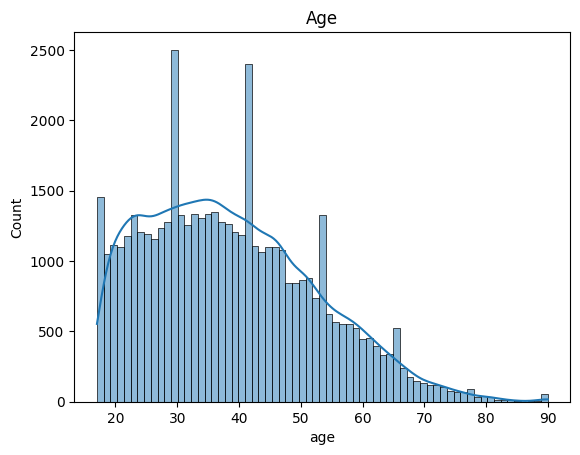

In [37]:
sns.histplot(data = data['age'], kde=True)
plt.title('Age')
plt.show()

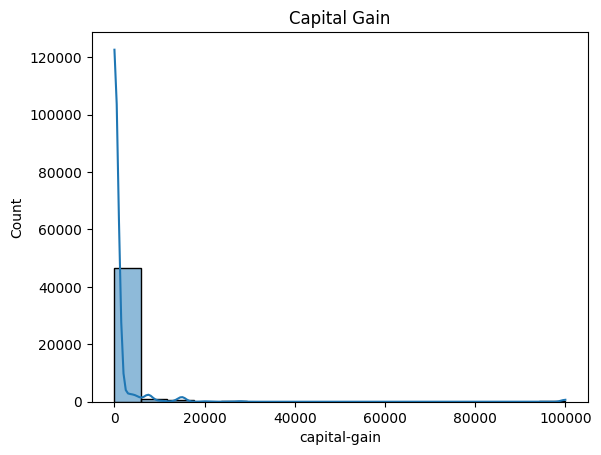

In [38]:
sns.histplot(data = data['capital-gain'], kde=True)
plt.title('Capital Gain')
plt.show()

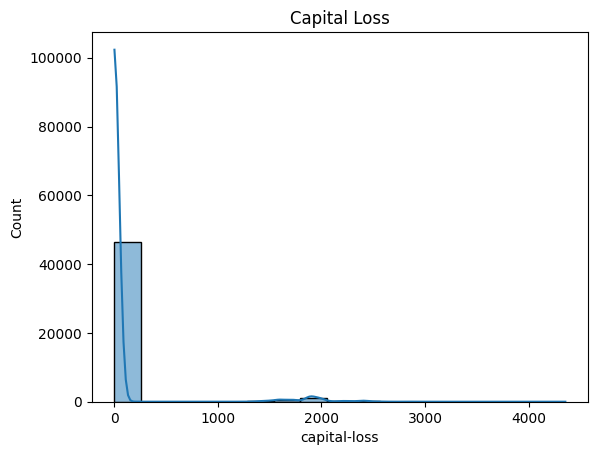

In [39]:
sns.histplot(data = data['capital-loss'], kde=True)
plt.title('Capital Loss')
plt.show()

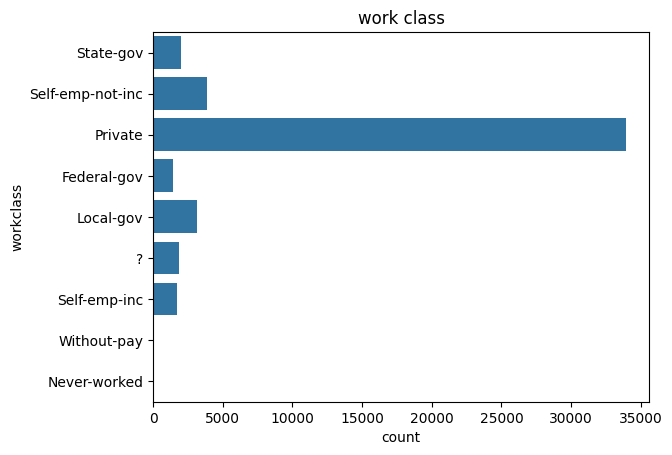

In [41]:
sns.countplot(data = data['workclass'])
plt.title('work class')
plt.show()

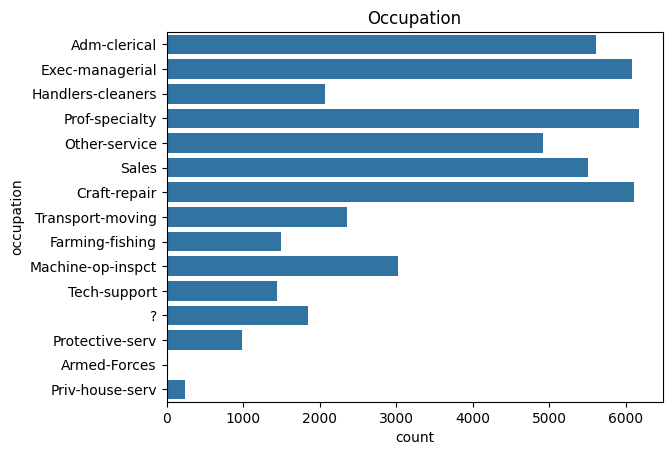

In [23]:
sns.countplot(data = data['occupation'])
plt.title('Occupation')
plt.show()

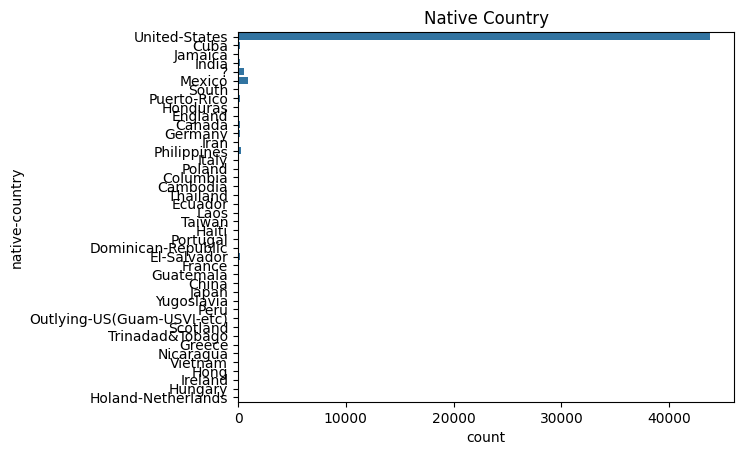

In [24]:
sns.countplot(data = data['native-country'])
plt.title('Native Country')
plt.show()

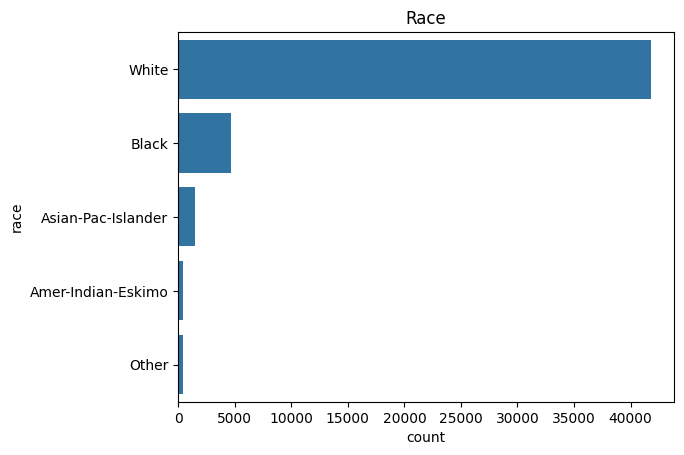

In [25]:
sns.countplot(data = data['race'])
plt.title('Race')
plt.show()

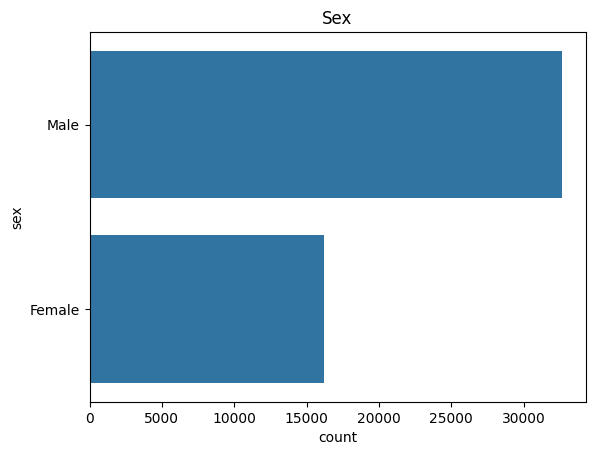

In [26]:
sns.countplot(data = data['sex'])
plt.title('Sex')
plt.show()

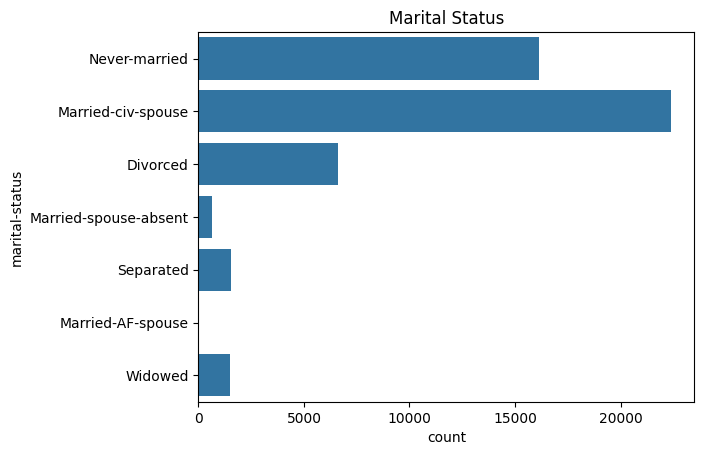

In [28]:
sns.countplot(data = data['marital-status'])
plt.title('Marital Status')
plt.show()

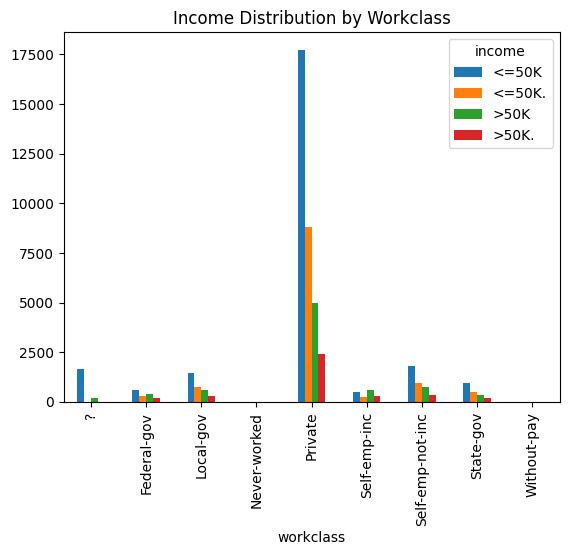

In [35]:
pd.crosstab(data['workclass'], data['income']).plot(kind='bar')
plt.title('Income Distribution by Workclass')
plt.show()

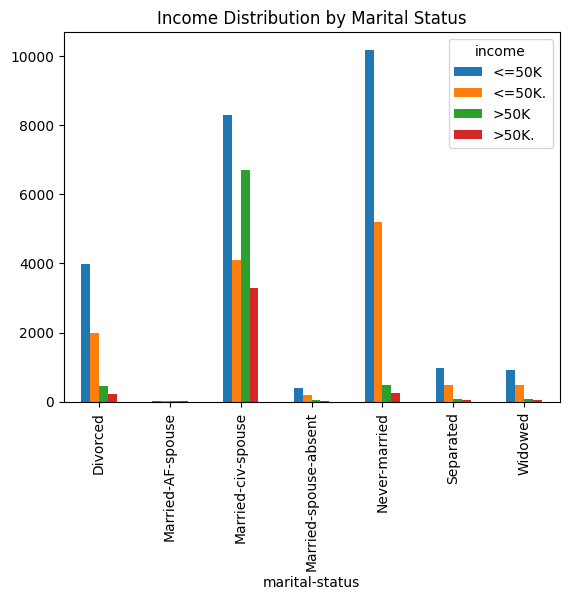

In [34]:
pd.crosstab(data['marital-status'], data['income']).plot(kind='bar')
plt.title('Income Distribution by Marital Status')
plt.show()

# Detecting Outliers

###Age, fnlwgt, education-num, capital-gain, capital-loss, hours-per-week(Columns with Integers only)

In [60]:
q1 = data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].quantile(0.25)
q3 = data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']].quantile(0.75)
iqr = q3 - q1

threshold = 1.5
outliers = data[(data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] < q1 - threshold * iqr) | (data[['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']] > q3 + threshold * iqr)]
print(outliers.count())

age                 216
workclass             0
fnlwgt             1453
education             0
education-num      1794
marital-status        0
occupation            0
relationship          0
race                  0
sex                   0
capital-gain       4035
capital-loss       2282
hours-per-week    13496
native-country        0
dtype: int64
